# Task 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

# Features Information

The dataset appears to be marketing and customer interactions related to a bank. Here's a brief description of each feature:

age: Represents the age of the individual.

job: Describes the occupation or job of the person.

marital: Indicates the marital status of the person (e.g., married, single, divorced).

education: Represents the educational level of the person (e.g., basic, high school, university).

default: Indicates whether the person has credit in default ('yes', 'no', or 'unknown').

housing: Shows whether the person has a housing loan ('yes', 'no', or 'unknown').

loan: Indicates whether the person has a personal loan ('yes', 'no', or 'unknown').

contact: Describes the method of communication used to contact the person (e.g., 'cellular', 'telephone').

month: Represents the month of the last contact.

day_of_week: Indicates the day of the week of the last contact.

duration: Represents the duration of the last contact in seconds.

campaign: Indicates the number of contacts made during this campaign.

pdays: Describes the number of days since the person was last contacted or -1 if they were not previously contacted.

previous: Represents the number of contacts made before this campaign.

poutcome: Indicates the outcome of the previous marketing campaign.

emp.var.rate: Describes the employment variation rate.

cons.price.idx: Represents the consumer price index.

cons.conf.idx: Indicates the consumer confidence index.

euribor3m: Represents the Euribor 3-month rate.

nr.employed: Describes the number of employees.

y: The target variable, indicating whether the person subscribed to a term deposit ('yes' or 'no').

# Loading Data and Libraries

In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import export_text
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\nibin\\Downloads\\bank+marketing\\bank-additional\\bank-additional\\bank-additional.csv", sep=";")

# Data inspection

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
df.shape

(4119, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Drop 'duration' column as it is highly correlated with the target and can lead to overfitting
df = df.drop('duration', axis=1)

In [10]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


# EDA and Data Visualization

Checking unique value constarints of the Features

In [22]:
df['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [23]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [24]:
df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [25]:
df['age'].unique()

array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [11]:
# Checking the correlation between the features
corr = df.corr()

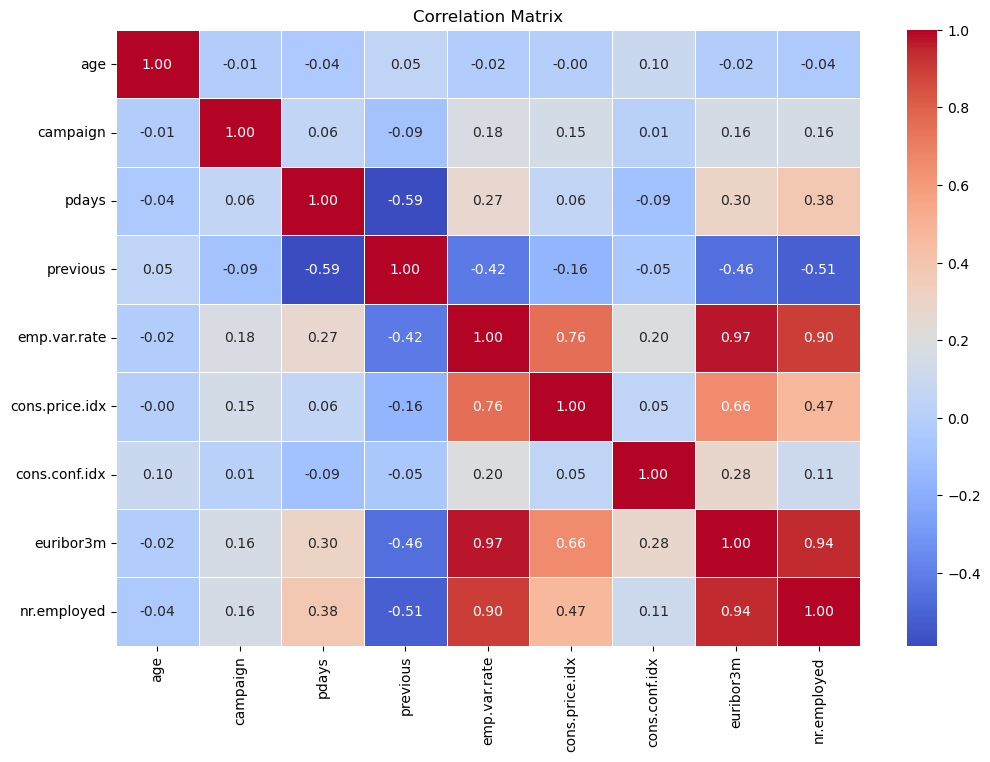

In [12]:
# Confusion Matrix visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()   

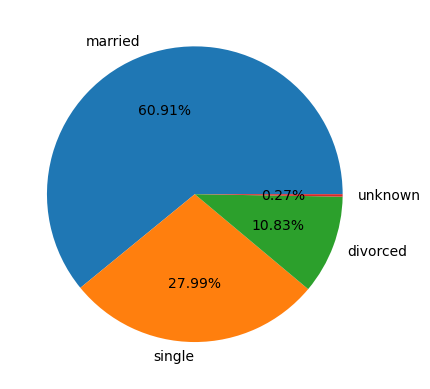

In [20]:
# Marital status Distribution
x=df["marital"].value_counts().head(10)

plt.pie(x, labels=x.index, autopct="%0.2f%%")
plt.show()

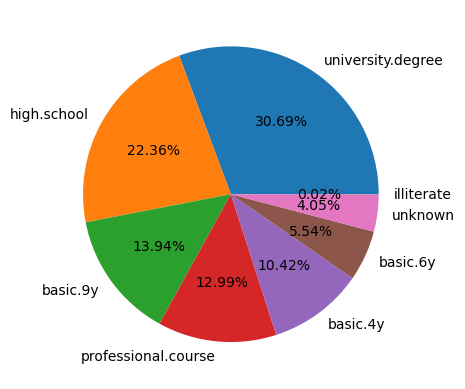

In [21]:
# Education Status Distribution
x=df["education"].value_counts().head(10)

plt.pie(x, labels=x.index, autopct="%0.2f%%")
plt.show()

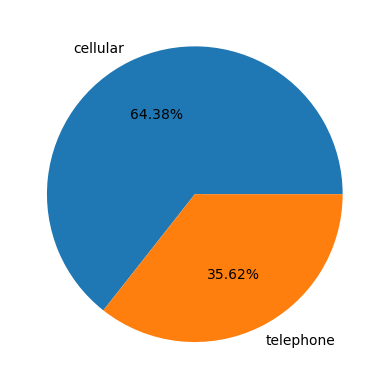

In [39]:
# Contact Distribution
x=df["contact"].value_counts().head(10)

plt.pie(x, labels=x.index, autopct="%0.2f%%")
plt.show()

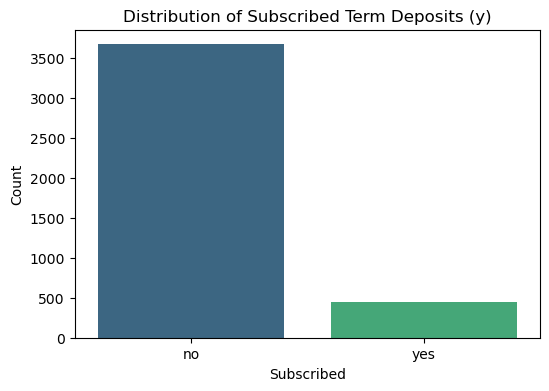

In [14]:
# Distribution of Subscription terms
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribution of Subscribed Term Deposits (y)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

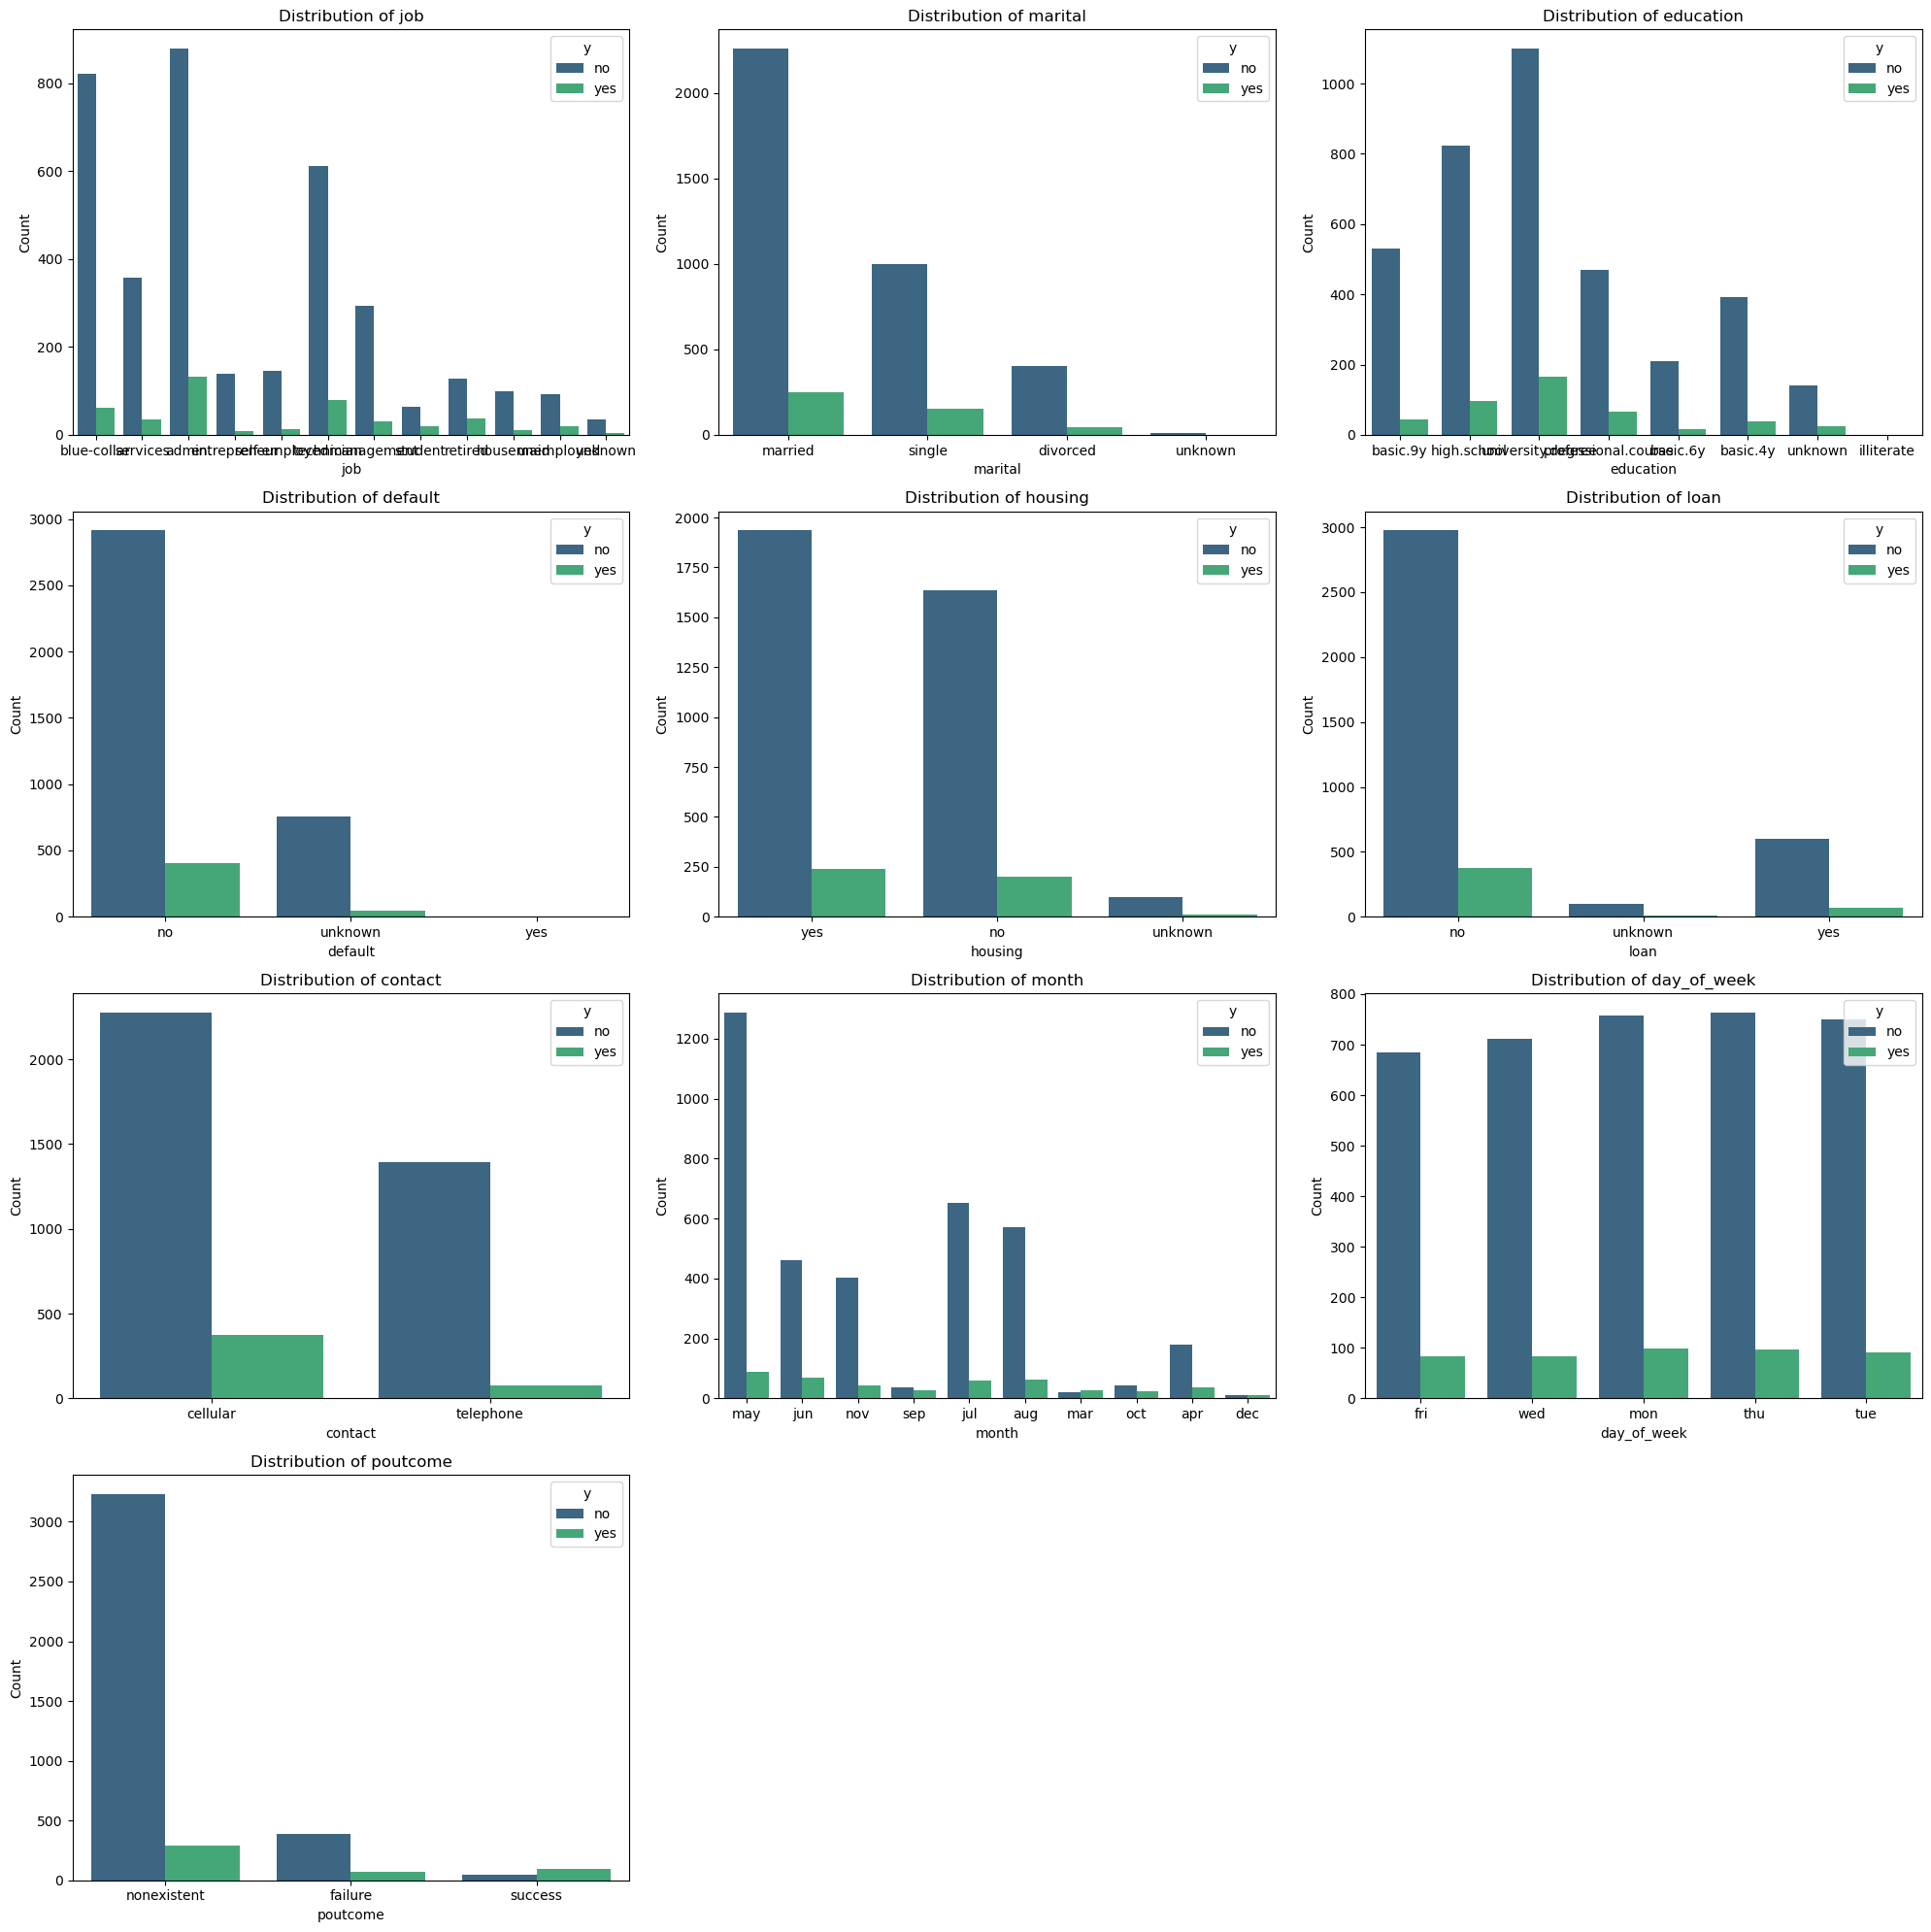

In [17]:
# Distribution of Categorical features
categorical_features = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=feature, data=df, hue='y', palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

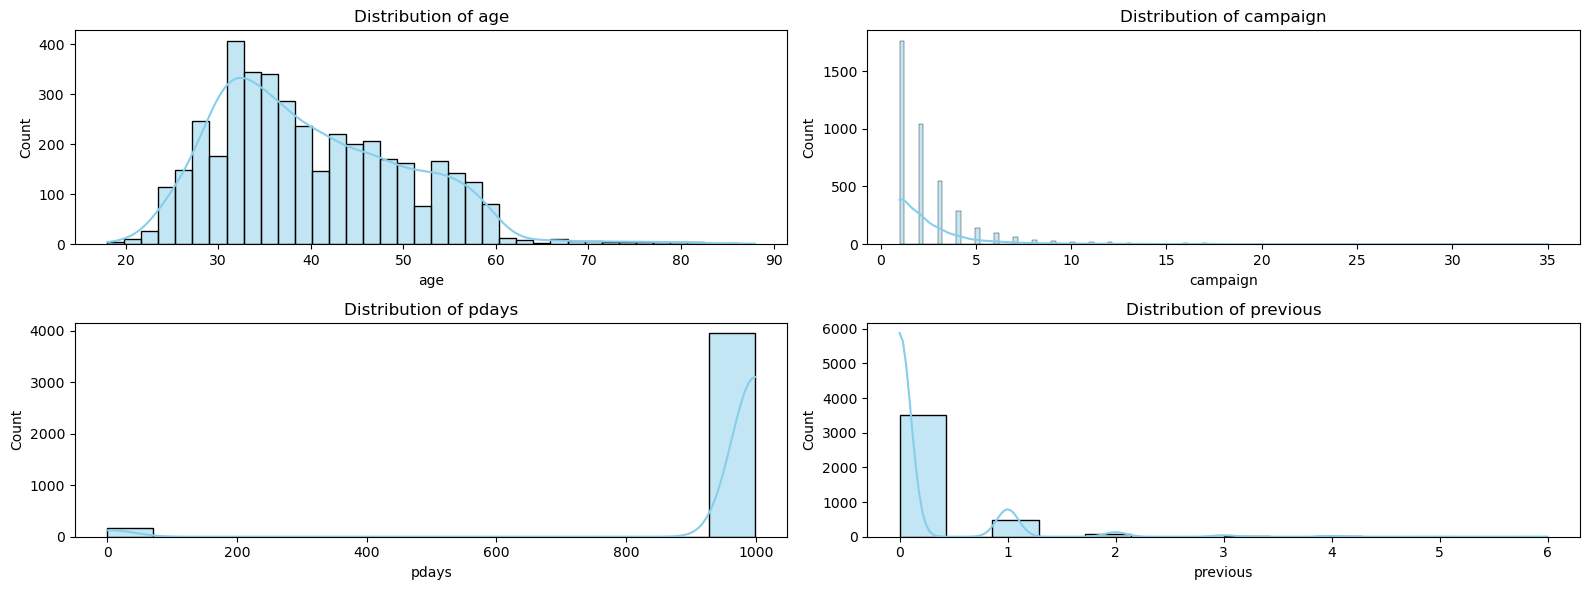

In [18]:
# Distribution of Numeric features
numeric_features = ['age', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(16, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()   

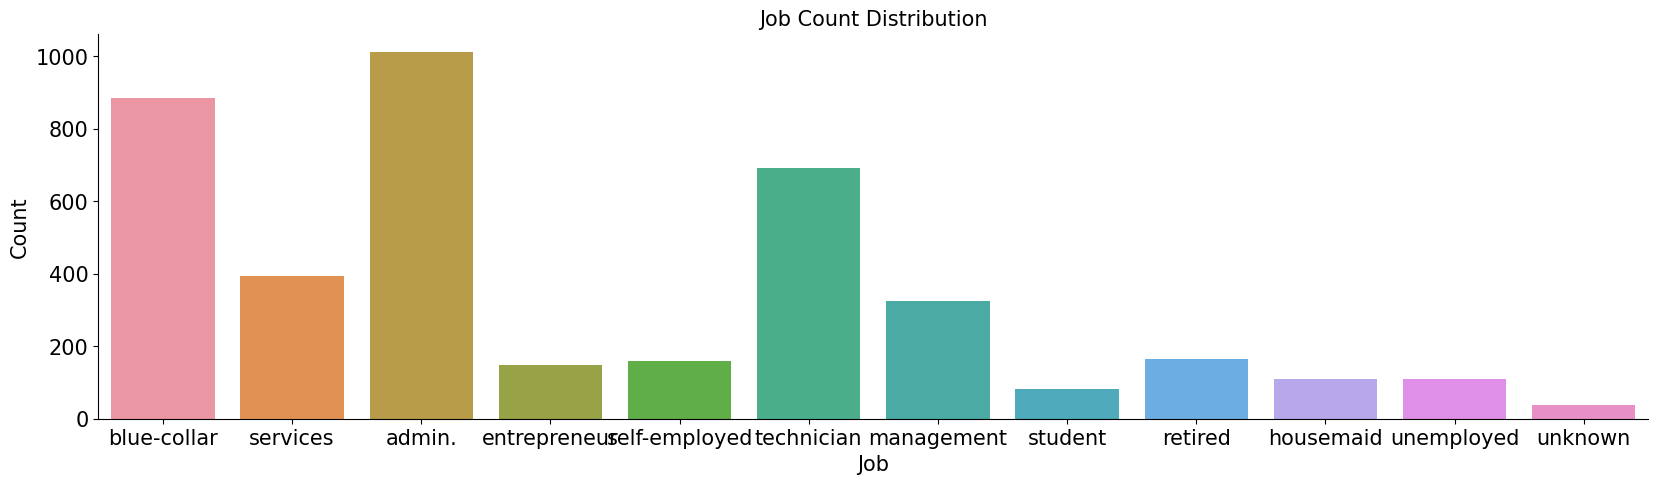

In [101]:
# Job count Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

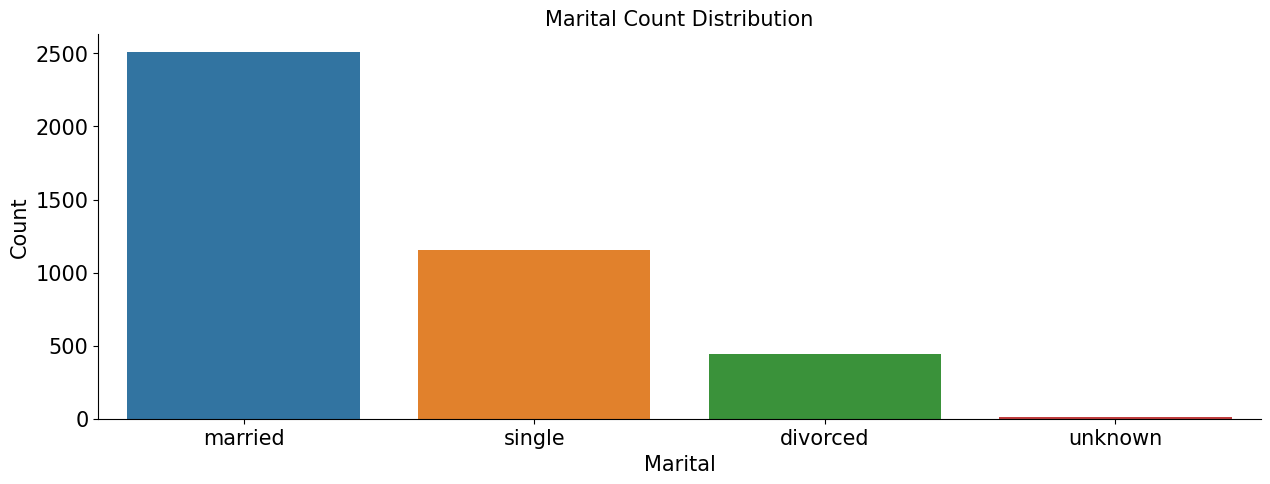

In [99]:
# marital status count Distribution
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


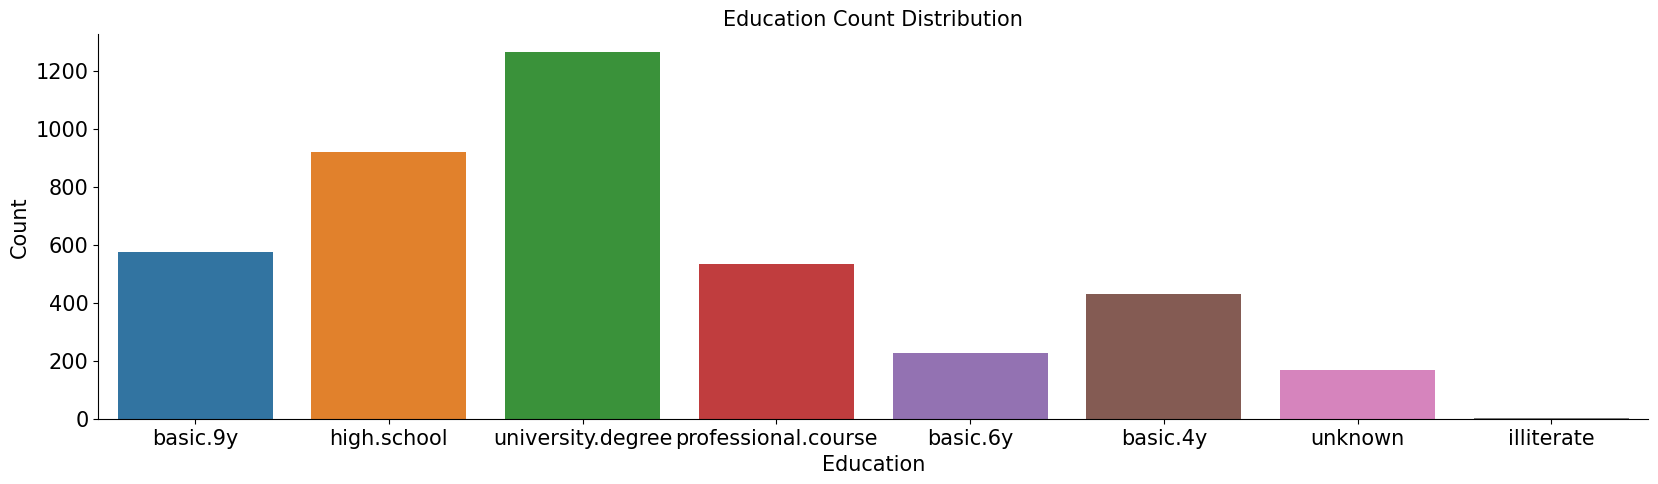

In [91]:
# Education count Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


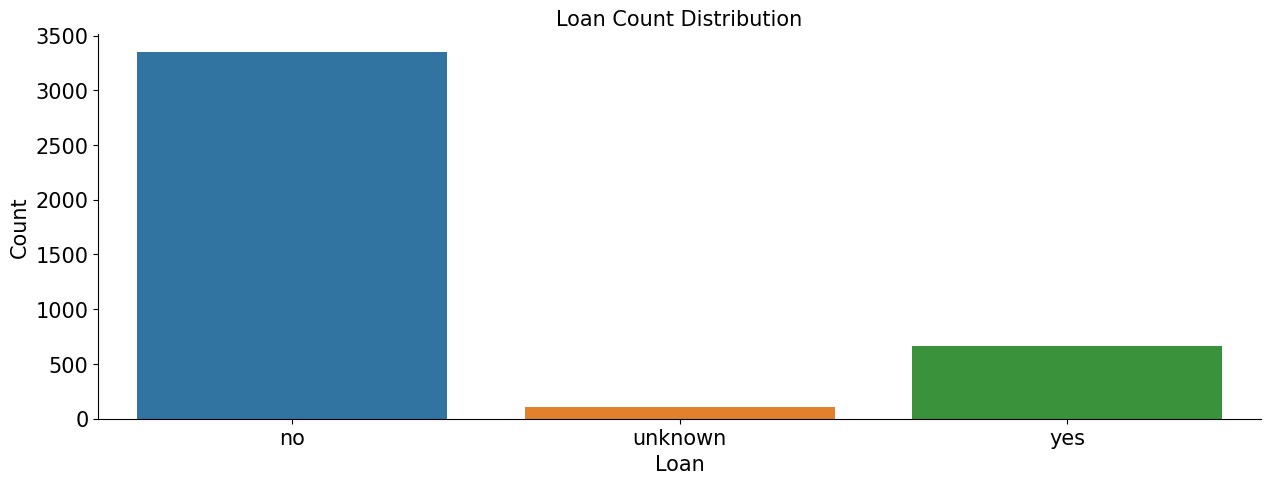

In [102]:
# Loan count Distribution
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'loan', data = df)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


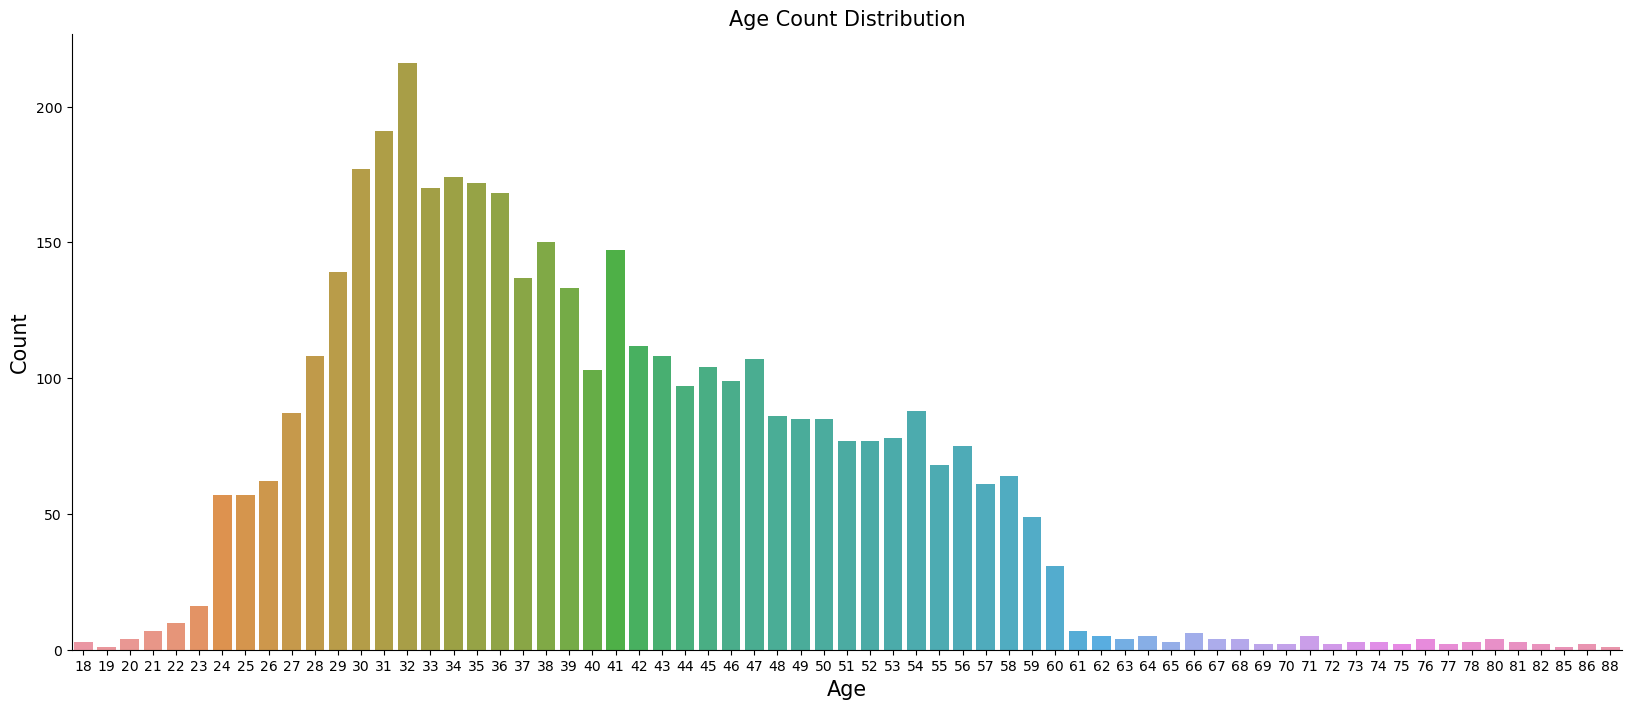

In [89]:
# Age count Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

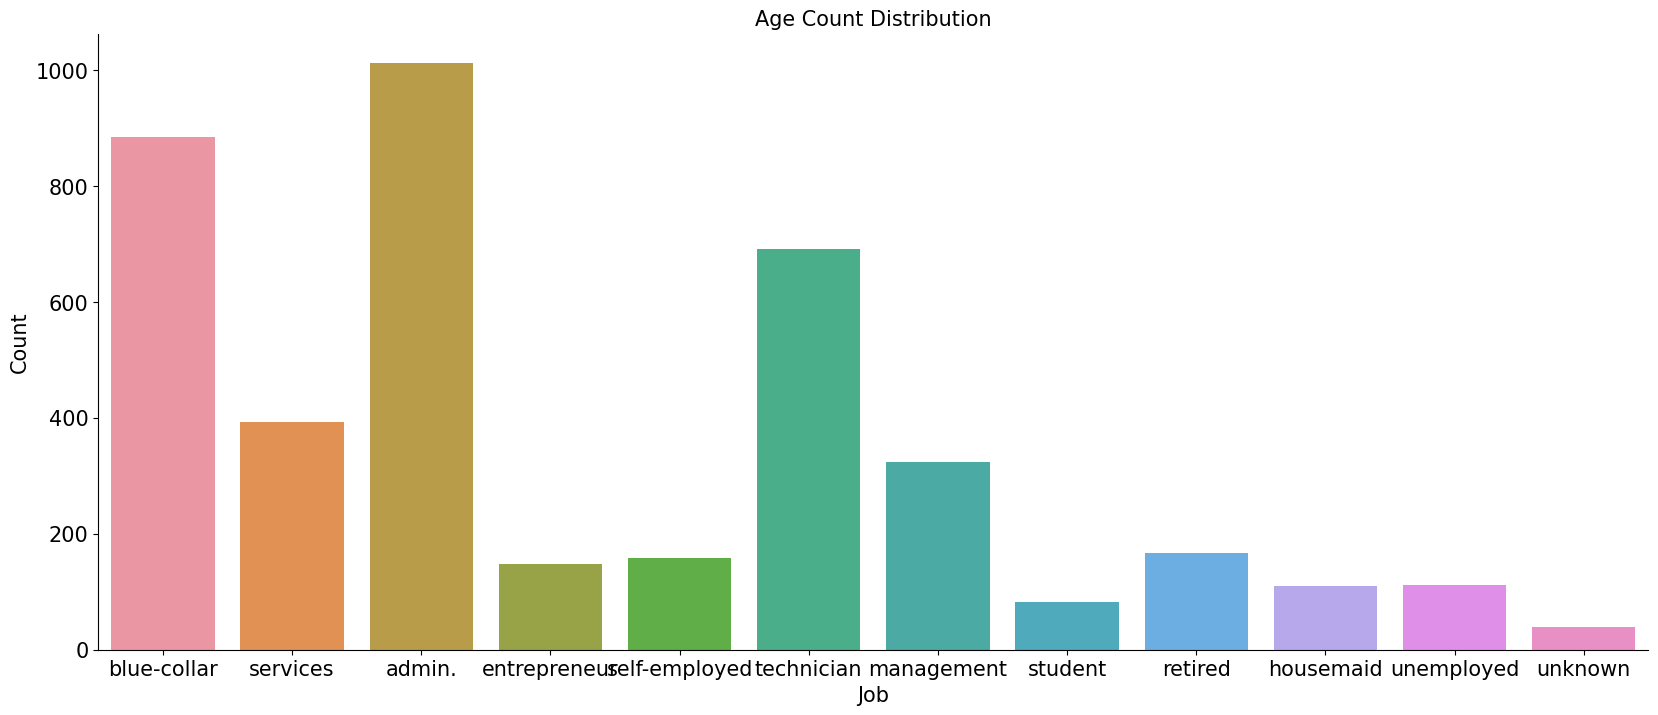

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


In [66]:
# Making a clone of the original data incase if some issue happens in the future process, the original data will be unharmed
dt = df.copy()

In [67]:
dt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [68]:
dt.shape

(4119, 20)

# Model Building 

In [69]:
# Label encoding ie. converting string column into numeric column.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [70]:
# Transforming the columns 
for col in dt.columns:
    if dt[col].dtype == 'object':
        dt[col] = le.fit_transform(dt[col])

In [71]:
dt

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [62]:
# Splitting the data into feature and target 
x = dt.drop('y', axis=1)  # Features
y = dt['y']               # Target

In [73]:
# Splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [74]:
# Feeding the train data to Decision Tree Classifier Model
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
y_predict = dc.predict(x_test)

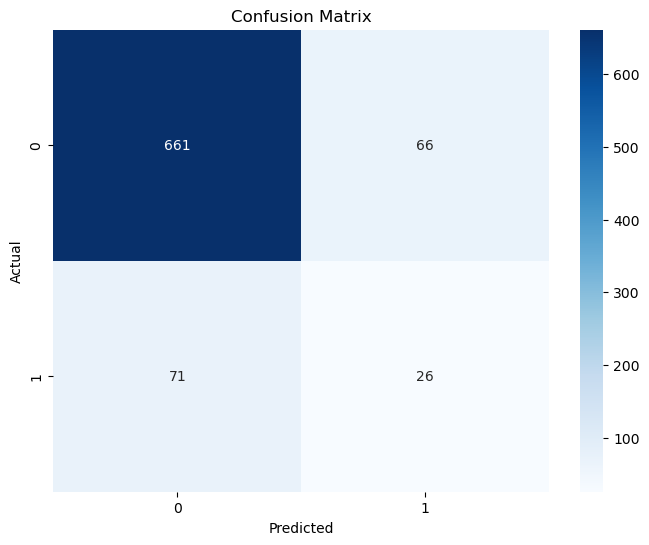

Accuracy: 0.8337378640776699
Precision: 0.8299733205774957
Recall: 0.8337378640776699
F1 Score: 0.8318235200442724
Classification Report:
 <function classification_report at 0x00000194C83B2DD0>


In [83]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_report)

# Iteration by experimenting with Train and Test ratio

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)

In [85]:
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
y_predict = dc.predict(x_test)

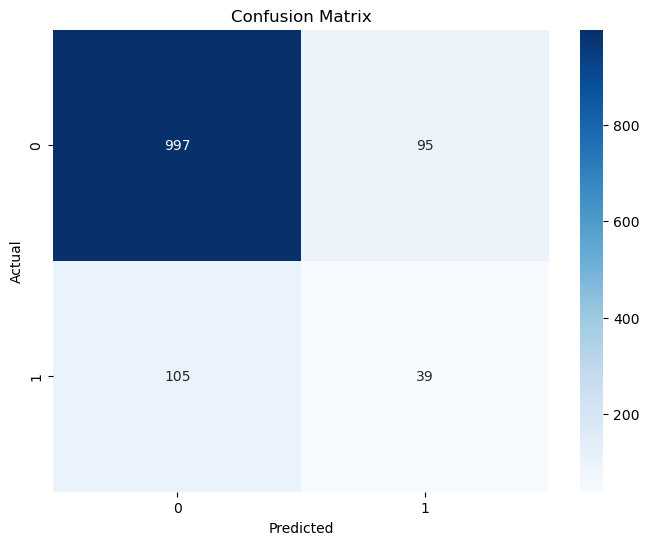

Accuracy: 0.8381877022653722
Precision: 0.8332227029355539
Recall: 0.8381877022653722
F1 Score: 0.8356461700744104
Classification Report:
 <function classification_report at 0x00000194C83B2DD0>


In [87]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_predict)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_predict)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_report)

The accuracy of the above two models is almost similar despite of iterating with some minor changes. 

The further actions can be developing some alternative models with other ML Classification Algorithms and experimenting with the features selections.

# Conclusion

The Decision Tree Classifier was successfully trained and evaluated on the Bank Marketing dataset. 

The analysis included data loading, preprocessing, exploration, visualizations, model training, and evaluation. The visualization of the dataset's characteristics, distribution of target variable, and correlation matrix assists in understanding the data.

The Decision Tree Rules offer interpretability by showing how the model makes decisions based on features. The evaluation metrics (accuracy, confusion matrix, and classification report) provide a comprehensive assessment of the model's performance on unseen data. 

The model can be iterated again and again over a period of time experimenting with different feature selection and normalizing the data. The iteration loop continues till we get the best accuracy model with favourable for our solution implementation.